In [1]:
# First, install the necessary libraries if you haven't already
# !pip install matplotlib pandas

# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.cm import ScalarMappable


# data in Gbps
data = {
    'Label': ['4-process UDP recv', 'iperf3 d2d', 'dfuse fio', 'ib_write d2d'],
    'Value': [93.8, 95.8, 107.4, 188.3]
}

# Create a DataFrame
df = pd.DataFrame(data)


Plot for poster. No x axis label. No title. Data labels within the bars.

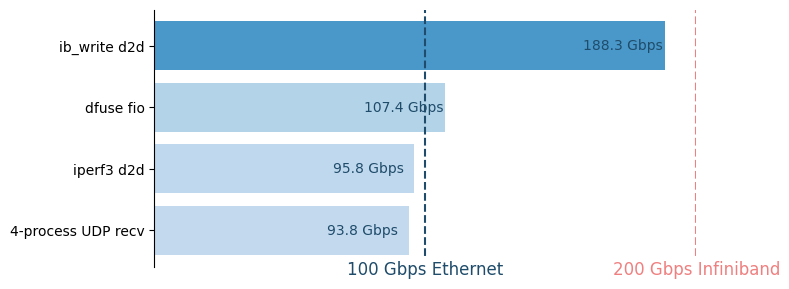

In [2]:
hpdf_blue = '#1F4C6B'

# Create a colormap and normalize the values
cmap = plt.get_cmap('Blues')
norm = Normalize(vmin=20, vmax=300)

# Create a color for each bar based on its value
colors = [cmap(norm(value)) for value in df['Value']]
# Create a color map for the bars in the blue range
# colors = plt.cm.Blues(np.linspace(0.2, 0.6, len(df)))

# Plotting
fig, ax = plt.subplots(figsize=(8, 2.5))

# Horizontal bar plot without borders
bars = ax.barh(df['Label'], df['Value'], color=colors, edgecolor='none')

# Add data labels to the right of each bar
for bar in bars:
    width = bar.get_width()
    if (width > 10):
        ax.text(width - 30, bar.get_y() + bar.get_height()/2, f'{width:,} Gbps',
            va='center', ha='left', fontsize=10, color=hpdf_blue)

# Add vertical dotted lines
ax.axvline(x=100, color=hpdf_blue, linestyle='--', linewidth=1.5)
ax.axvline(x=200, color='lightcoral', linestyle='--', linewidth=1.5)

ax.text(100, -0.5, '100 Gbps Ethernet', color=hpdf_blue, fontsize=12, ha='center', va='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white'))
ax.text(200, -0.5, '200 Gbps Infiniband', color='lightcoral', fontsize=12, ha='center', va='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white'))

# Hide the x-axis and y-axis lines, ticks, and labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks([])
# ax.yaxis.set_ticks([])

# Hide the axis labels and title
ax.set_xlabel('')
# ax.set_ylabel('')
ax.set_title('')

# Set the x-axis limit to fit the data scale
ax.set_xlim(0, 200)

# Remove the figure border
# fig.patch.set_visible(False)
ax.patch.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Save it as pdf
plt.savefig('limit.png')